# "Quantium Virtual Internship - Retail Strategy and Analytics - Task 1"
# by Jolomi Tosanwumi.

## *Coded with Python.*

## Importing useful libraries

In [1]:
# importing useful libraries
import numpy as np
import pandas as pd

from scipy.stats import ttest_ind_from_stats

import matplotlib.pyplot as plt

import re

from mlxtend import frequent_patterns

## Loading in the datasets

In [2]:
df1 = pd.read_csv('QVI_purchase_behaviour.csv')
df2 = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
# making a copy of the datasets as our working datasets
purchase_behaviour = df1.copy()
transaction_data = df2.copy()

## Data Exploration

### viewing the first 5 rows of the datasets

In [4]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
print(f'shape of purchase_behaviour is {purchase_behaviour.shape}')
print(f'shape of transaction_data is {transaction_data.shape}')

shape of purchase_behaviour is (72637, 3)
shape of transaction_data is (264836, 8)


###  quick info on the datasets

In [7]:
purchase_behaviour.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [9]:
purchase_behaviour['LYLTY_CARD_NBR'].unique().shape[0] == purchase_behaviour.shape[0] # checking for duplicates

True

In [10]:
purchase_behaviour['LIFESTAGE'].unique() # checking the unique lifestage

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [11]:
purchase_behaviour['PREMIUM_CUSTOMER'].unique() # checking the unique customer segements

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

### Converting Date column to datetime in python

In [12]:
transaction_data['DATE'] = transaction_data['DATE'].apply(lambda date: pd.to_datetime(date, unit ='D', 
                                                                                     origin=pd.Timestamp("30-12-1899")))

In [13]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
transaction_data['TXN_ID'].unique().shape[0] # checking the number of unique transactions

263127

In [15]:
transaction_data['PROD_NBR'].unique().shape # checking the number of unique product number

(114,)

In [16]:
# viewing the unique product names
unique_prod = set(transaction_data['PROD_NAME'])
print(len(unique_prod))
print(unique_prod)

114
{'Doritos Mexicana    170g', 'Natural Chip Co     Tmato Hrb&Spce 175g', 'Natural ChipCo Sea  Salt & Vinegr 175g', 'Old El Paso Salsa   Dip Chnky Tom Ht300g', 'Twisties Cheese     270g', 'WW D/Style Chip     Sea Salt 200g', 'French Fries Potato Chips 175g', 'Kettle Tortilla ChpsBtroot&Ricotta 150g', 'Smiths Thinly       Swt Chli&S/Cream175G', 'Cheetos Puffs 165g', 'Tyrrells Crisps     Lightly Salted 165g', 'NCC Sour Cream &    Garden Chives 175g', 'Smiths Crinkle      Original 330g', 'Old El Paso Salsa   Dip Tomato Med 300g', 'Doritos Corn Chips  Original 170g', 'Cheezels Cheese 330g', 'Kettle Sweet Chilli And Sour Cream 175g', 'Doritos Salsa       Medium 300g', 'Natural ChipCo      Hony Soy Chckn175g', 'Pringles SourCream  Onion 134g', 'Kettle Sensations   BBQ&Maple 150g', 'Infuzions Mango     Chutny Papadums 70g', 'Cheezels Cheese Box 125g', 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g', 'Thins Chips Seasonedchicken 175g', 'Smiths Chip Thinly  CutSalt/Vinegr175g', 'Old El Paso Salsa 

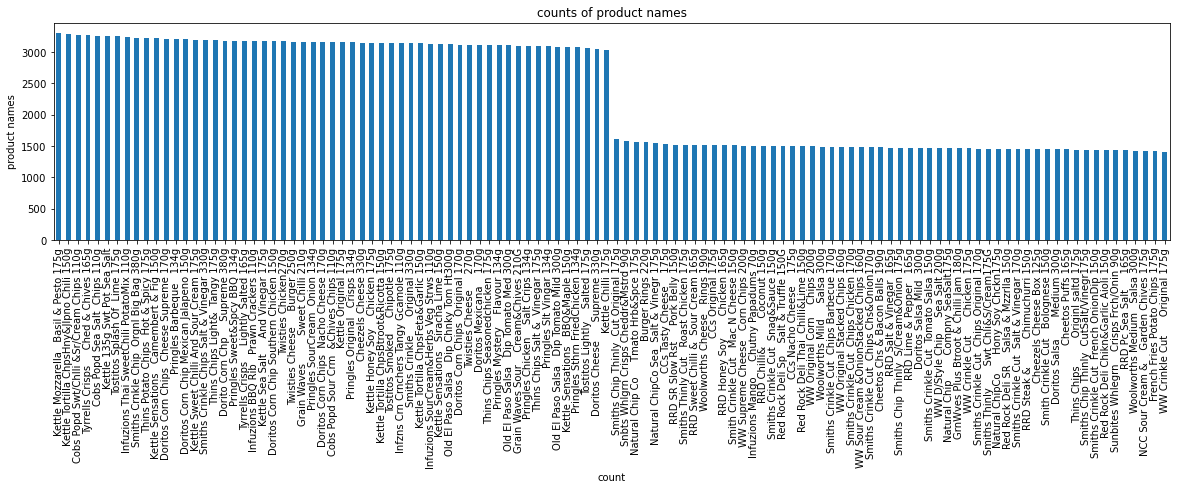

In [17]:
plt.figure(figsize=(20, 4))
transaction_data['PROD_NAME'].value_counts().plot.bar()
plt.title("counts of product names")
plt.xlabel("count")
plt.ylabel("product names")
plt.show()

### As we are only interested in words that will tell us if the product is chips or not, let's remove all salsa products and flag if a product is chip or not with ````is_chip```` column.

In [18]:
transaction_data['is_chip'] = (~transaction_data['PROD_NAME'].str.contains('salsa', case=False)).astype(np.int64)
unique_chips = set(transaction_data['PROD_NAME'][transaction_data['is_chip'] == 1])
print(f"unique chip product names are {len(unique_chips)} in number")
unique_prod - unique_chips # confirming that the remainder are salsa products

unique chip product names are 105 in number


{'Doritos Salsa       Medium 300g',
 'Doritos Salsa Mild  300g',
 'Old El Paso Salsa   Dip Chnky Tom Ht300g',
 'Old El Paso Salsa   Dip Tomato Med 300g',
 'Old El Paso Salsa   Dip Tomato Mild 300g',
 'Red Rock Deli SR    Salsa & Mzzrlla 150g',
 'Smiths Crinkle Cut  Tomato Salsa 150g',
 'Woolworths Medium   Salsa 300g',
 'Woolworths Mild     Salsa 300g'}

In [19]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1


### filtering out the chip transactions as a dataframe. 

In [20]:
chips_df = transaction_data[transaction_data['is_chip'] == 1]

In [21]:
chips_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,is_chip
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.0
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,1.0
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,0.0
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1.0
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,1.0
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,1.0
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,1.0
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,1.0


### There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let's investigate further the case where 200 packets of chips are bought in one transaction.

In [22]:
chips_df[chips_df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,1
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,1


### There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer. Let's see if the customer has had other transactions.

In [23]:
transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,1
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,1


### It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [24]:
chips_df = chips_df[chips_df['LYLTY_CARD_NBR'] != 226000] # filtering out the outlier

In [25]:
# checking if there is a change in elasped day after removing the outlier
print(chips_df['DATE'].min())
print(chips_df['DATE'].max())
print()
print(transaction_data['DATE'].min())
print(transaction_data['DATE'].max())

2018-07-01 00:00:00
2019-06-30 00:00:00

2018-07-01 00:00:00
2019-06-30 00:00:00


In [26]:
# checking the duration of both the transaction and chips datasets.
print(chips_df['DATE'].unique().shape[0])
print(transaction_data['DATE'].unique().shape[0])

364
364


### There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

In [27]:
date_jump = set(pd.date_range(chips_df['DATE'].min(), chips_df['DATE'].max())) - set(chips_df['DATE'])
print(date_jump)
print(set(pd.date_range(chips_df['DATE'].min(), chips_df['DATE'].max())) - set(transaction_data['DATE']))

{Timestamp('2018-12-25 00:00:00', freq='D')}
{Timestamp('2018-12-25 00:00:00', freq='D')}


### we see that the missing date is Christmas day. Let's see the number of transactions per day.

In [28]:
daily_chips = chips_df['DATE'].value_counts()
daily_chips[list(date_jump)[0]] = 0
daily_chips = daily_chips.sort_index()
daily_chips.head()

2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
Name: DATE, dtype: int64

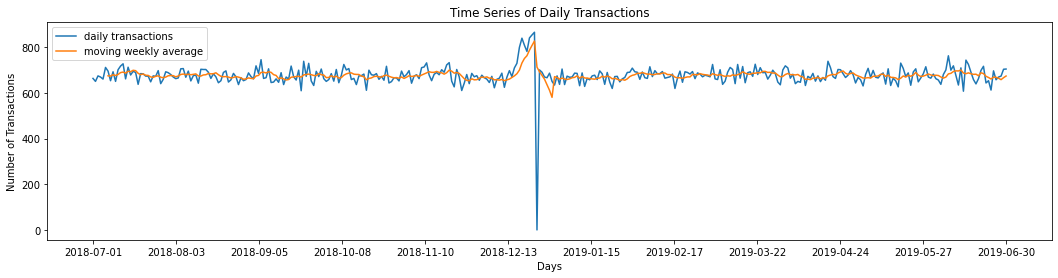

In [29]:
plt.figure(figsize=(18, 4))
plt.plot(daily_chips)
plt.plot(daily_chips.rolling(7).mean())
plt.xticks(pd.date_range(chips_df['DATE'].min(), chips_df['DATE'].max(), 12))
plt.title("Time Series of Daily Transactions")
plt.xlabel("Days")
plt.ylabel("Number of Transactions")
plt.legend(["daily transactions", "moving weekly average"])
plt.show()

### We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

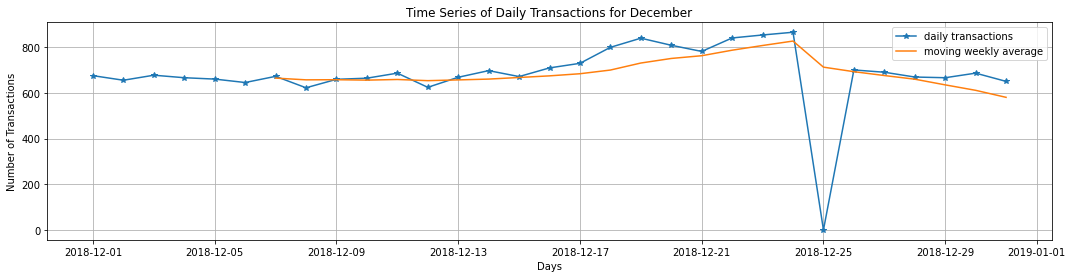

In [30]:
plt.figure(figsize=(18, 4))
december_chips = daily_chips[daily_chips.index.month == 12]
plt.plot(december_chips, marker='*')
plt.plot(december_chips.rolling(7).mean())
plt.grid()
plt.title("Time Series of Daily Transactions for December")
plt.xlabel("Days")
plt.ylabel("Number of Transactions")
plt.legend(["daily transactions", "moving weekly average"])
plt.show()

### We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day. We may want to make more products available the day before christmas as this will make us to pretty maintain our weekly average sales.

## Creating ````PACK SIZE```` feature

In [31]:
patt = r'[0-9]+'
chips_df['PACK_SIZE'] = chips_df['PROD_NAME'].apply(lambda prod_name: int(re.findall(patt, prod_name)[0]))
print(sorted(chips_df['PACK_SIZE'].unique()))
chips_df.head()

[70, 90, 110, 125, 134, 135, 150, 160, 165, 170, 175, 180, 190, 200, 210, 220, 250, 270, 330, 380]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1,150


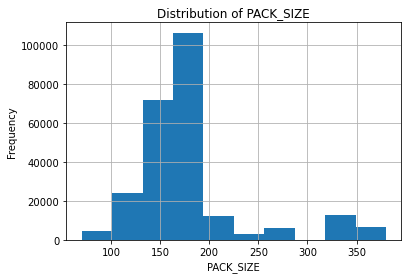

In [32]:
chips_df.hist('PACK_SIZE')
plt.xlabel("PACK_SIZE")
plt.ylabel("Frequency")
plt.title("Distribution of PACK_SIZE")
plt.show()

### We now see that pack sizes between 162.5g and 187.5 have the highest frequency.

In [33]:
unique_chips # checking the unique chip product names

{'Burger Rings 220g',
 'CCs Nacho Cheese    175g',
 'CCs Original 175g',
 'CCs Tasty Cheese    175g',
 'Cheetos Chs & Bacon Balls 190g',
 'Cheetos Puffs 165g',
 'Cheezels Cheese 330g',
 'Cheezels Cheese Box 125g',
 'Cobs Popd Sea Salt  Chips 110g',
 'Cobs Popd Sour Crm  &Chives Chips 110g',
 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
 'Dorito Corn Chp     Supreme 380g',
 'Doritos Cheese      Supreme 330g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Doritos Corn Chips  Cheese Supreme 170g',
 'Doritos Corn Chips  Nacho Cheese 170g',
 'Doritos Corn Chips  Original 170g',
 'Doritos Mexicana    170g',
 'French Fries Potato Chips 175g',
 'Grain Waves         Sweet Chilli 210g',
 'Grain Waves Sour    Cream&Chives 210G',
 'GrnWves Plus Btroot & Chilli Jam 180g',
 'Infuzions BBQ Rib   Prawn Crackers 110g',
 'Infuzions Mango     Chutny Papadums 70g',
 'Infuzions SourCream&Herbs Veg Strws 110g',
 'Infuzions Thai SweetChili PotatoMix 110g',
 'Infzns 

In [34]:
# creating a dictionary to map brand names to their abbreviations.
abbreviation_map = {'Dorito': 'Doritos', 'Grain': 'GrnWves', 'Infzns': 'Infuzions', 'Natural': 'NCC', 'Red': 'RRD',
                    'Smith': 'Smiths', 'Sunbites': 'Snbts'}

### Creating ````BRAND_NAME```` feature.

In [35]:
chips_df['BRAND_NAME'] = chips_df['PROD_NAME'].apply(lambda prod_name: prod_name.split()[0]).apply(\
                                    lambda prod_name: abbreviation_map[prod_name.split()[0]] if prod_name.split()[0] 
                                        in abbreviation_map else prod_name)

In [36]:
chips_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,175,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1,150,Kettle


In [37]:
unique_brands = set(chips_df['BRAND_NAME'])
print(f"unique chips brand names are {sorted(list(unique_brands))}, and they are {len(unique_brands)} in number")

unique chips brand names are ['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos', 'French', 'GrnWves', 'Infuzions', 'Kettle', 'NCC', 'Pringles', 'RRD', 'Smiths', 'Snbts', 'Thins', 'Tostitos', 'Twisties', 'Tyrrells', 'WW', 'Woolworths'], and they are 21 in number


### Merging transaction data to customer data

In [38]:
merged_df = pd.merge(chips_df, purchase_behaviour, on='LYLTY_CARD_NBR', how='left')

In [39]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [40]:
assert merged_df.shape[0] == chips_df.shape[0] # checking for no duplicates

In [41]:
merged_df.isnull().any(None) == False # checking if there are any Nan values

True

In [42]:
#merged_df.to_csv("cleaned_transaction_customer_data.csv")

## Data Analysis

In [43]:
len(set(purchase_behaviour['LYLTY_CARD_NBR']) - set(merged_df['LYLTY_CARD_NBR'])) # checking number of customers who didn't
                                                                                  # chips

1350

In [44]:
#chips_customers_df = purchase_behaviour.set_index('LYLTY_CARD_NBR').loc[merged_df['LYLTY_CARD_NBR'].unique()]

In [45]:
customer_segments = merged_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']) # creating a groupby object of 
                                                                         # premium customers-lifestage groups.

In [46]:
# defining a function to plot a multiple bar chart of a given dataframe. Function is optimized for our task.
def customer_segment_bar(df, loc='best', bbox_to_anchor=None, ylabel=None, title=None):
    """This function plots a multiple bar chart  of a given dataframe.
    Signature: customer_segment_bar(df, loc='best')
    
    Args:
        df: a dataframe with a two-level index to be used for multiple bar charts. 
         The first level is for color coding the bars, while the second level for grouping the bars.
         
        loc: used to specify the location of the legend axes. Same as those of matplotlib.pyplot
        
        bbox_to_anchor: used to set the location of the legend axes. Same as those of matplotlib.pyplot
        
        ylabel: a string to be used for the ylabel of the chart
        
        title: a string to be used for the title of the chart
        
    Return:
        A multiple barchart.
    
    """
    a = sorted(list({i[0] for i in df.index})) # gets the unique first level index
    b = sorted(list({i[1] for i in df.index})) # gets the unique second level index
    
    x = np.arange(len(b)) # to be used for the horizontal axis
    y = [[df[i][j] for j in b] for i in a] # uses a and b to get the data from df as a list of lists.
    
    # plotting the multiple bar chart
    fig = plt.figure(figsize=(8, 4))
    plt.bar(x, y[0], color='r', width=0.25)
    plt.bar(x+0.25, y[1], color='b', width=0.25)
    plt.bar(x+0.5, y[2], color='g', width=0.25)
    plt.xticks(x+0.25, b, rotation=90)
    
    if bbox_to_anchor is not None:
        plt.legend(a, loc=loc, bbox_to_anchor=bbox_to_anchor)
        
    else:
        plt.legend(a, loc=loc)
        
    plt.xlabel("Customer Segments")
    
    if ylabel is not None:
        plt.ylabel(ylabel)
        
    if title is not None:
        plt.title(title)
        
    plt.grid()
#    plt.show()

### Total sales by ````LIFESTAGE```` and ````PREMIUM_CUSTOMER````

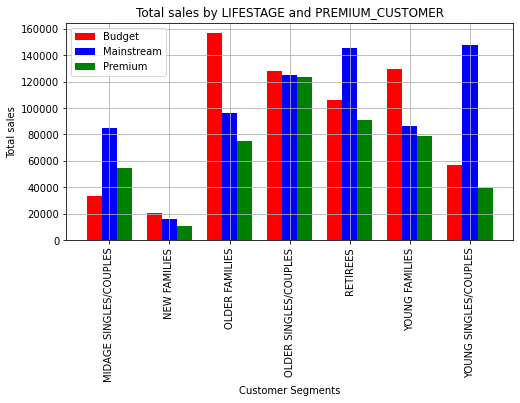

In [47]:
customer_segment_bar(customer_segments['TOT_SALES'].sum(), 
                     ylabel="Total sales", 
                     title="Total sales by LIFESTAGE and PREMIUM_CUSTOMER")

### Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees. Let's see if the higher sales are due to there being more customers who buy chips.

### Number of customers by ````LIFESTAGE```` and ````PREMIUM_CUSTOMER````

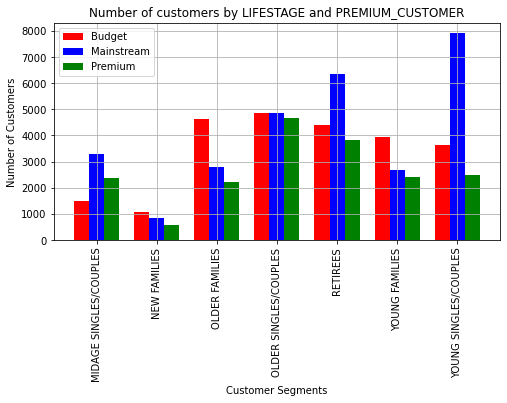

In [48]:
customer_segment_bar(customer_segments['LYLTY_CARD_NBR'].apply(lambda x: x.unique().shape[0]),
                    ylabel="Number of Customers",
                    title="Number of customers by LIFESTAGE and PREMIUM_CUSTOMER")

### There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

### Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.

### Average number of units per customer by ````LIFESTAGE```` and ````PREMIUM_CUSTOMER````

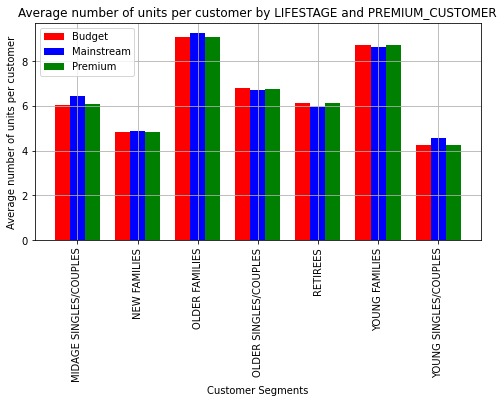

In [49]:
customer_segment_bar(customer_segments.apply(lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].unique().shape[0]),
                    ylabel="Average number of units per customer",
                    title="Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER")

### Older families and young families in general buy more chips per customer. What could then be the major driver of sales for Mainstream and Premium Old Familes? Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

### Average price per unit by ````LIFESTAGE```` and ````PREMIUM_CUSTOMER````

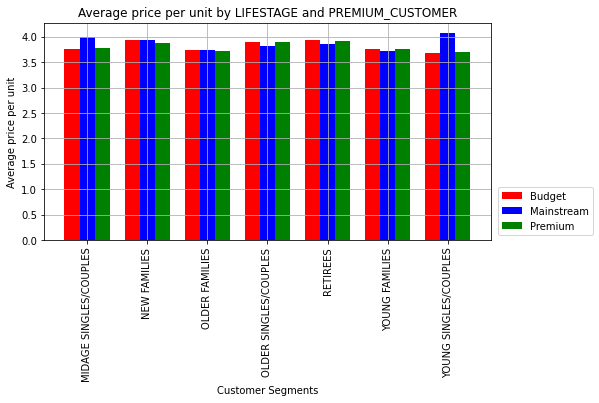

In [50]:
customer_segment_bar(customer_segments.apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()), loc='lower right', 
                     bbox_to_anchor=(1.24, 0), ylabel="Average price per unit",
                     title="Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER")

### All old families again have amost same average price per unit. What could be driving sales for Budget Old Families? Also, Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts. Let's check the number of orders made by each customer segment.

### Number of orders by ````LIFESTAGE```` and ````PREMIUM_CUSTOMER````

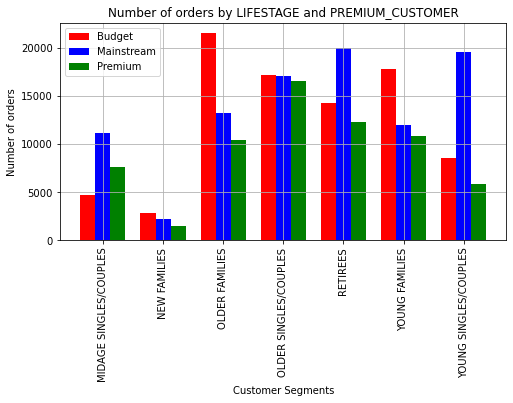

In [51]:
customer_segment_bar(customer_segments['TOT_SALES'].count(),
                    ylabel="Number of orders",
                    title="Number of orders by LIFESTAGE and PREMIUM_CUSTOMER")

### We see that premium and budget midage and young singles made fewer orders compared to their mainstream counterparts. Also, Budget Old Families make more orders than their Mainstream and premium counterparts. This could be the major driver for their increased sales. Since Budget Old Families have approximately the same number of units per order and the same price per unit with their Mainstream and premium counterparts; the number of orders was scaled by the number of customers they have more than their Mainstream and premium counterparts.

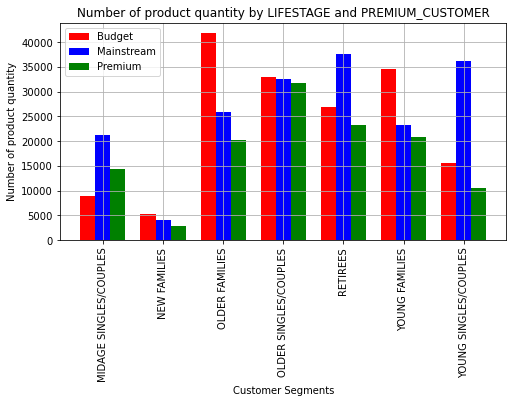

In [52]:
customer_segment_bar(customer_segments['PROD_QTY'].sum(),
                    ylabel="Number of product quantity",
                    title="Number of product quantity by LIFESTAGE and PREMIUM_CUSTOMER")

### More product quantities are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees. Let's see if the higher sales are due to there being more customers who buy chips.

### As the difference in average price per unit isn't large, we can check if this difference is statistically significant by performing an independent t-test between mainstream vs premium and budget midage and young singles and couples.

### t-test

In [53]:
# filtering out the mainstream young singles/couples and midage dataframe
mainstream_mid_young = merged_df[
        (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')
        &
        (
            (merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
            |
            (merged_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')
        )
]

In [54]:
# confirming that our filtration was done properly
assert mainstream_mid_young['PREMIUM_CUSTOMER'].unique()[0] == 'Mainstream'
mainstream_mid_young['LIFESTAGE'].unique()

array(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'], dtype=object)

In [55]:
# filtering out premium and budget young singles/couples and midage dataframe
premium_budget_mid_young = merged_df[
    (
        (merged_df['PREMIUM_CUSTOMER'] == 'Premium')
        &
        (
            (merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
            |
            (merged_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')
        )
    )
    
    |
    
    (
        (merged_df['PREMIUM_CUSTOMER'] == 'Budget')
        &
        (
            (merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
            |
            (merged_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES')
        )
    )
]

In [56]:
# confirming that our filtration was done properly
print(premium_budget_mid_young['PREMIUM_CUSTOMER'].unique())
premium_budget_mid_young['LIFESTAGE'].unique()

['Premium' 'Budget']


array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'], dtype=object)

In [57]:
# calculating the mean, number of observations and standard deviation for the two samples
m1 = mainstream_mid_young['TOT_SALES'].sum() / mainstream_mid_young['PROD_QTY'].sum()
n1 = mainstream_mid_young['PROD_QTY'].sum()
s1 = np.sqrt((mainstream_mid_young['PROD_QTY'] * (mainstream_mid_young['TOT_SALES'] - m1)**2).sum() / (n1-1))

m2 = premium_budget_mid_young['TOT_SALES'].sum() / premium_budget_mid_young['PROD_QTY'].sum()
n2 = premium_budget_mid_young['PROD_QTY'].sum()
s2 = np.sqrt((premium_budget_mid_young['PROD_QTY'] * (premium_budget_mid_young['TOT_SALES'] - m2)**2).sum() / (n2-1))

t, p = ttest_ind_from_stats(m1, s1, n1, m2, s2, n2) # computing the t-statistics
p /= 2 # returned p-value is that of two-sided t-test, halving it will return a one-sided p-value
print(f"t statistics is {t}")
print(f"p-value is {p}")

t statistics is 11.666855201285447
p-value is 9.835818678292617e-32


In [58]:
deg_of_freedom = n1+n2-2
print(deg_of_freedom)

106794


### we reject the null hypothesis that (premium and budget midage and young singles/couples average price per unit) >= that of mainstream beacause p < 0.5. Also t is greater than 1.645 which is the critical t value gotten from a t-table. We conclude that this difference is significant and is not due to random chance.

## Affinity test

### We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Budget - Older Families, Mainstream - Retirees, and Mainstream -Young Singles/Couples (who are more willing to pay more per packet of chips). For instance, let's find out if they tend to buy a particular brand of chips.

In [59]:
# one hot encoding of the brand names
brand_name_onehot = merged_df.reset_index()[['index', 'BRAND_NAME']].pivot_table(index='index', columns='BRAND_NAME', 
                                                                                 aggfunc=len, fill_value=0)

assert (brand_name_onehot > 1).sum().sum() == 0
assert merged_df.shape[0] == brand_name_onehot.shape[0]

brand_name_onehot = brand_name_onehot == 1 # converting the onehot encoding to boolean values

In [60]:
# filtering out the budget older dataframe
budget_older = merged_df[
        (merged_df['PREMIUM_CUSTOMER'] == 'Budget')
        &
        (merged_df['LIFESTAGE'] == 'OLDER FAMILIES')
]

# filtering out the mainstream young singles/couples dataframe
mainstream_young = merged_df[
        (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')
        &
        (merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
]

# filtering out the budget older dataframe
mainstream_retirees = merged_df[
        (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')
        &
        (merged_df['LIFESTAGE'] == 'RETIREES')
]

In [61]:
def get_affinity_result(flag, alias, one_hot, min_support=1e-4, max_len=2, use_colnames=True, metric='lift', min_threshold=0):
    """This function returns the affinity result of segment of a feature for another feature
    
    Signature: get_affinity_result(ind1, alias, one_hot, ind2=merged_df.index, min_support=1e-4, max_len=2, use_colnames=True, 
                        metric='lift', min_threshold=0)
                        
    Args:
        flag: a pandas index object with boolean values flagging if an index is that of the segment of the feature we which to 
        do affinity test for.
        
        alias: (string); the alias of the the feature segment we which to use.
        
        one_hot: a onehot pandas dataframe we which to calculate the affinity of the segment of the feature with. This 
        dataframe should be as required by frequent_patterns.apriori function of python's mlxtend package.
        
        min_support, max_len, and use_colnames are same as those of frequent_patterns.apriori function of python's mlxtend 
        package.
        
        metric and min_threshold are same of those of frequent_patterns.association_rules of python's mlxtend package.
        
    Return: a pandas dataframe showing the affinity result where our test column (alias) is the antecendent.
    
    """
    
    
    one_hot_copy = one_hot.copy() # making a copy of one_hot so as not to mutate it
    one_hot_copy[alias] = flag # flagging if an order was made by a our test column (alias) customer
    
    # using apriori to reduce the itemsets
    itemsets = frequent_patterns.apriori(one_hot_copy, min_support=min_support, max_len=max_len, use_colnames=use_colnames)
    
    # computing the association rules
    rules = frequent_patterns.association_rules(itemsets, metric=metric, min_threshold=min_threshold)
    
    # selecing rules where our test column (alias) is the antecendent
    alias_rules = rules[rules['antecedents'] == frozenset({alias})].sort_values(metric, ascending=False)
    
    return alias_rules

### Budget Older Families Brand Affinity

In [62]:
budget_older_brand_affinity = get_affinity_result(merged_df.index.isin(budget_older.index), 'B_OLD', brand_name_onehot)

# return rules where lift > 1 (these show if there is an affinity that is better than random guess)
budget_older_brand_affinity[budget_older_brand_affinity['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(B_OLD),(RRD),0.087193,0.066147,0.006922,0.079390,1.200216,0.001155,1.014386
40,(B_OLD),(Woolworths),0.087193,0.006144,0.000632,0.007251,1.180168,0.000097,1.001115
38,(B_OLD),(WW),0.087193,0.041825,0.004284,0.049131,1.174664,0.000637,1.007683
0,(B_OLD),(Burger),0.087193,0.006339,0.000644,0.007391,1.165947,0.000092,1.001060
28,(B_OLD),(Snbts),0.087193,0.012191,0.001236,0.014177,1.162895,0.000173,1.002014
13,(B_OLD),(French),0.087193,0.005747,0.000576,0.006600,1.148499,0.000074,1.000859
20,(B_OLD),(NCC),0.087193,0.030271,0.003003,0.034443,1.137822,0.000364,1.004321
2,(B_OLD),(CCs),0.087193,0.018445,0.001828,0.020963,1.136549,0.000220,1.002573
26,(B_OLD),(Smiths),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236
5,(B_OLD),(Cheetos),0.087193,0.011863,0.001139,0.013061,1.101037,0.000105,1.001214


### From the rules above, we see that Budget-Older Families customers' highest brand affinity seems to be for the RRD brand.

### Mainstream Single/Young Couples Brand Affinity

In [63]:
mainstream_young_brand_affinity = get_affinity_result(merged_df.index.isin(mainstream_young.index), 'M_YOUNG', 
                                                      brand_name_onehot)

# return rules where lift > 1 (these show if there is an affinity that is better than random guess)
mainstream_young_brand_affinity[mainstream_young_brand_affinity['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,(M_YOUNG),(Tyrrells),0.079209,0.026108,0.002509,0.031672,1.213098,0.000441,1.005746
35,(M_YOUNG),(Twisties),0.079209,0.038316,0.003648,0.046050,1.201858,0.000613,1.008108
11,(M_YOUNG),(Doritos),0.079209,0.102229,0.009642,0.121725,1.190712,0.001544,1.022198
33,(M_YOUNG),(Tostitos),0.079209,0.038385,0.003607,0.045538,1.186370,0.000567,1.007495
19,(M_YOUNG),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537
23,(M_YOUNG),(Pringles),0.079209,0.101735,0.009382,0.118451,1.164310,0.001324,1.018962
9,(M_YOUNG),(Cobs),0.079209,0.039284,0.003502,0.044208,1.125335,0.000390,1.005151
16,(M_YOUNG),(Infuzions),0.079209,0.057555,0.005066,0.063958,1.111264,0.000507,1.006841
14,(M_YOUNG),(GrnWves),0.079209,0.031369,0.002618,0.033054,1.053702,0.000133,1.001742
31,(M_YOUNG),(Thins),0.079209,0.057044,0.004726,0.059660,1.045867,0.000207,1.002782


### From the rules above, we see that Mainstream-Young Singles/Couples customers' highest brand affinity seems to be for the Tyrrells brand.

### Mainstream Retirees Brand Affinity

In [64]:
mainstream_retirees_brand_affinity = get_affinity_result(merged_df.index.isin(mainstream_retirees.index), 'M_RETIREES', 
                                                      brand_name_onehot)

# return rules where lift > 1 (these show if there is an affinity that is better than random guess)
mainstream_retirees_brand_affinity[mainstream_retirees_brand_affinity['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(M_RETIREES),(GrnWves),0.080935,0.031369,0.002703,0.033400,1.064747,0.000164,1.002101
30,(M_RETIREES),(Thins),0.080935,0.057044,0.004859,0.060040,1.052525,0.000242,1.003188
34,(M_RETIREES),(Twisties),0.080935,0.038316,0.003250,0.040160,1.048142,0.000149,1.001922
23,(M_RETIREES),(Pringles),0.080935,0.101735,0.008523,0.105308,1.035124,0.000289,1.003994
16,(M_RETIREES),(Infuzions),0.080935,0.057555,0.004790,0.059189,1.028395,0.000132,1.001737
7,(M_RETIREES),(Cheezels),0.080935,0.018655,0.001548,0.019129,1.025378,0.000038,1.000483
10,(M_RETIREES),(Doritos),0.080935,0.102229,0.008466,0.104607,1.023260,0.000192,1.002656
18,(M_RETIREES),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,0.000180,1.002674


### From the rules above, we see that Mainstream Retirees customers' highest brand affinity seems to be for the GrnWves brand.

### Let's find out if these three customer segments tend to buy a particular pack size. We use same steps for brand affinity.

In [65]:
# one hot encoding of the pack sizes
pack_size_onehot = merged_df.reset_index()[['index', 'PACK_SIZE']].pivot_table(index='index', columns='PACK_SIZE', aggfunc=len, 
                                                                      fill_value=0)

assert (pack_size_onehot > 1).sum().sum() == 0

pack_size_onehot = pack_size_onehot == 1 # converting the onehot encoding to boolean values

### Budget Older Families Pack Size Affinity

In [66]:
budget_older_pack_affinity = get_affinity_result(merged_df.index.isin(budget_older.index), 'B_OLD', pack_size_onehot)

# return rules where lift > 1 (these show if there is an affinity that is better than random guess)
budget_older_pack_affinity[budget_older_pack_affinity['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,(B_OLD),(180),0.087193,0.005950,0.000673,0.007716,1.296882,0.000154,1.001780
6,(B_OLD),(125),0.087193,0.005893,0.000616,0.007065,1.198940,0.000102,1.001181
24,(B_OLD),(190),0.087193,0.012138,0.001264,0.014502,1.194748,0.000206,1.002399
15,(B_OLD),(160),0.087193,0.012037,0.001240,0.014223,1.181635,0.000191,1.002218
30,(B_OLD),(220),0.087193,0.006339,0.000644,0.007391,1.165947,0.000092,1.001060
3,(B_OLD),(90),0.087193,0.012191,0.001236,0.014177,1.162895,0.000173,1.002014
27,(B_OLD),(200),0.087193,0.018128,0.001816,0.020824,1.148676,0.000235,1.002753
0,(B_OLD),(70),0.087193,0.006108,0.000576,0.006600,1.080671,0.000043,1.000496
19,(B_OLD),(170),0.087193,0.080988,0.007238,0.083016,1.025036,0.000177,1.002211
12,(B_OLD),(150),0.087193,0.162937,0.014542,0.166775,1.023558,0.000335,1.004607


### From the rules above, we see that Budget OlderFamilies customers' highest pack size affinity seems to be for 180g. Let's check which brand has this pack size. 

In [67]:
merged_df[merged_df['PACK_SIZE'] == 180]['BRAND_NAME'].unique()

array(['GrnWves'], dtype=object)

### Since they have affinity for RRD brand, let's check the avaliable pack size for this brand. 

In [68]:
merged_df[merged_df['BRAND_NAME'] == 'RRD']['PACK_SIZE'].unique()

array([150, 165], dtype=int64)

### This explains why RRD's pack size wasn't the most desired by Budget Older Families customers. It is because the brand has more than one pack size available and the customers choice was divided by these pack sizes. Overall. Budget Older Families have affinity for moderate pack size.

### Mainstream Single/Young Couples Pack size Affinity

In [69]:
mainstream_young_pack_affinity = get_affinity_result(merged_df.index.isin(mainstream_young.index), 'M_YOUNG', 
                                                      pack_size_onehot)

# return rules where lift > 1 (these show if there is an affinity that is better than random guess)
mainstream_young_pack_affinity[mainstream_young_pack_affinity['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,(M_YOUNG),(270),0.079209,0.025472,0.002513,0.031723,1.245410,0.000495,1.006456
39,(M_YOUNG),(380),0.079209,0.026003,0.002537,0.032030,1.231788,0.000477,1.006227
37,(M_YOUNG),(330),0.079209,0.050823,0.004843,0.061144,1.203085,0.000818,1.010994
8,(M_YOUNG),(134),0.079209,0.101735,0.009382,0.118451,1.164310,0.001324,1.018962
29,(M_YOUNG),(210),0.079209,0.025419,0.002334,0.029472,1.159425,0.000321,1.004176
4,(M_YOUNG),(110),0.079209,0.090731,0.008312,0.104943,1.156634,0.001126,1.015878
10,(M_YOUNG),(135),0.079209,0.013200,0.001175,0.014838,1.124104,0.000130,1.001663
33,(M_YOUNG),(250),0.079209,0.012843,0.001135,0.014327,1.115480,0.000117,1.001505


### From the rules above, we see that Mainstream - Young Singles/Couples customers' highest pack size affinity seems to be for 270g. Let's check which brand has this pack size.

In [70]:
merged_df[merged_df['PACK_SIZE'] == 270]['BRAND_NAME'].unique()

array(['Twisties'], dtype=object)

### Since they have affinity for Tyrrells brand, let's check the avaliable pack size for this brand. 

In [71]:
merged_df[merged_df['BRAND_NAME'] == 'Tyrrells']['PACK_SIZE'].unique()

array([165], dtype=int64)

### Let's check if other brands share the same pack size (165g) with Tyrrells.

In [72]:
merged_df[merged_df['PACK_SIZE'] == 165]['BRAND_NAME'].unique()

array(['Tyrrells', 'Cheetos', 'RRD'], dtype=object)

### Let's check the support of these other brands with Mainstream Young Singles / Couples customers.

In [73]:
mainstream_young_brand_affinity[(mainstream_young_brand_affinity['consequents'] == frozenset({'Cheetos'}))
                                   | 
                                   (mainstream_young_brand_affinity['consequents'] == frozenset({'RRD'}))
                                  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(M_YOUNG),(Cheetos),0.079209,0.011863,0.000673,0.008494,0.715997,-0.000267,0.996602
25,(M_YOUNG),(RRD),0.079209,0.066147,0.003546,0.044771,0.676842,-0.001693,0.977622


### As we can see, the supports of these two brands are very small. This maybe the culprit why the affinity lift for 165g is small.

### Mainstream Retirees Brand Affinity

In [74]:
mainstream_retirees_pack_affinity = get_affinity_result(merged_df.index.isin(mainstream_retirees.index), 'M_RETIREES', 
                                                      pack_size_onehot)

# return rules where lift > 1 (these show if there is an affinity that is better than random guess)
mainstream_retirees_pack_affinity[mainstream_retirees_pack_affinity['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(M_RETIREES),(250),0.080935,0.012843,0.001167,0.014422,1.122876,0.000128,1.001601
22,(M_RETIREES),(180),0.080935,0.005950,0.000515,0.006360,1.068905,0.000033,1.000413
29,(M_RETIREES),(210),0.080935,0.025419,0.002189,0.027041,1.063774,0.000131,1.001666
0,(M_RETIREES),(70),0.080935,0.006108,0.000523,0.006460,1.057640,0.000028,1.000354
8,(M_RETIREES),(134),0.080935,0.101735,0.008523,0.105308,1.035124,0.000289,1.003994
6,(M_RETIREES),(125),0.080935,0.005893,0.000490,0.006059,1.028212,0.000013,1.000167
19,(M_RETIREES),(170),0.080935,0.080988,0.006630,0.081923,1.011542,0.000076,1.001018
12,(M_RETIREES),(150),0.080935,0.162937,0.013334,0.164747,1.011111,0.000147,1.002168
34,(M_RETIREES),(270),0.080935,0.025472,0.002083,0.025739,1.010460,0.000022,1.000273
4,(M_RETIREES),(110),0.080935,0.090731,0.007413,0.091587,1.009437,0.000069,1.000943


### From the rules above, we see that Mainstream Retirees customers' highest pack size affinity seems to be for 250g. Let's check which brand has this pack size. 

In [75]:
merged_df[merged_df['PACK_SIZE'] == 250]['BRAND_NAME'].unique()

array(['Twisties'], dtype=object)

### Since they have affinity for GrnWves brand, let's check the avaliable pack size for this brand. 

In [76]:
merged_df[merged_df['BRAND_NAME'] == 'GrnWves']['PACK_SIZE'].unique()

array([210, 180], dtype=int64)

### This explains why GrnWvess pack size wasn't the most desired by Mainstream Retirees customers. It is because the brand has more than one pack size available and the customers choice was divided by these pack sizes. Overall.

## Since Budget Older Families have a high units per order, we will check their affinity for product quanitity so as to recommend one to our category manager.

In [77]:
# one hot encoding of the product quantity
prod_qty_onehot = merged_df.reset_index()[['index', 'PROD_QTY']].pivot_table(index='index', columns='PROD_QTY', aggfunc=len, 
                                                                      fill_value=0)

assert (prod_qty_onehot > 1).sum().sum() == 0

#prod_qty_onehot = prod_qty_onehot == 1 # converting the onehot encoding to boolean values

### Budget Older Families Prod qty Affinity

In [78]:
budget_prod_qty_affinity = get_affinity_result(merged_df.index.isin(budget_older.index), 'B_OLD', prod_qty_onehot)

# return rules where lift > 1 (these show if there is an affinity that is better than random guess)
budget_prod_qty_affinity[budget_prod_qty_affinity['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(B_OLD),(4),0.087193,0.001504,0.000170,0.001952,1.298356,0.000039,1.000449
8,(B_OLD),(5),0.087193,0.001682,0.000154,0.001766,1.050156,0.000007,1.000085
3,(B_OLD),(2),0.087193,0.891911,0.081045,0.929488,1.042131,0.003276,1.532918


### Budget Older Families tend to have a high affinity for 4 product quanities. We may want to group brands in fours in stores where they frequent.

### We may want to look at affinity test per transaction.

### Our aim is to answer the question: given that a customer has ordered for brand X, will he/she order for brand Y for the same transaction?

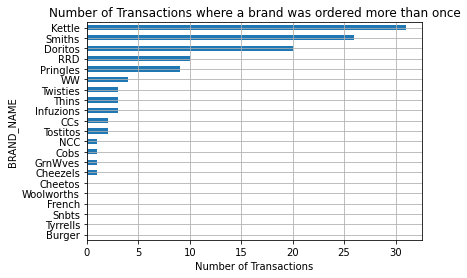

In [79]:
# one hot encoding of the brand names
transaction_brand_onehot = merged_df[['TXN_ID', 'BRAND_NAME']].pivot_table(index='TXN_ID', columns='BRAND_NAME', 
                                                                                 aggfunc=len, fill_value=0)
(transaction_brand_onehot > 1).sum().sort_values().plot.barh()
plt.xlabel("Number of Transactions")
plt.title("Number of Transactions where a brand was ordered more than once")
plt.grid()
plt.show()

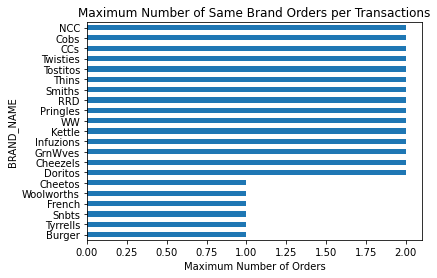

In [80]:
transaction_brand_onehot.max().sort_values().plot.barh()
plt.title("Maximum Number of Same Brand Orders per Transactions")
plt.xlabel("Maximum Number of Orders")
plt.show()

In [81]:
orders_per_transaction = transaction_brand_onehot.sum(axis=1).sort_values(ascending=False)
orders_per_transaction.describe()

count    245255.000000
mean          1.006055
std           0.077892
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
dtype: float64

In [82]:
orders_per_transaction[orders_per_transaction > 1].head(10)

TXN_ID
230356    3
1162      3
102237    3
228741    3
108462    3
211119    3
12098     2
99740     2
210058    2
94189     2
dtype: int64

### We see that some customers made as high as three orders per transaction. Let see example of such a case.

In [83]:
merged_df[merged_df['TXN_ID'] == 230356]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
73593,2018-12-07,229,229001,230356,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4,1,90,Snbts,OLDER FAMILIES,Premium
73594,2018-12-07,229,229001,230356,20,Doritos Cheese Supreme 330g,2,11.4,1,330,Doritos,OLDER FAMILIES,Premium
73595,2018-12-07,229,229001,230356,86,Cheetos Puffs 165g,2,5.6,1,165,Cheetos,OLDER FAMILIES,Premium


### Here, we see three orders same day for two units each with different brand. It seems to be different members of the family ordering their prefered brand and pack size.

In [84]:
# using apriori to reduce the itemsets
general_brand_itemsets = frequent_patterns.apriori(transaction_brand_onehot > 0, min_support=1e-4, max_len=3, use_colnames=True)

In [85]:
# association rules
general_brand_rules = frequent_patterns.association_rules(general_brand_itemsets, metric='lift', min_threshold=1e-2)
general_brand_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kettle),(Doritos),0.168221,0.102767,0.000179,0.001066,0.010378,-0.017108,0.898191
1,(Doritos),(Kettle),0.102767,0.168221,0.000179,0.001746,0.010378,-0.017108,0.833234
2,(Pringles),(Doritos),0.102314,0.102767,0.000139,0.001355,0.013185,-0.010376,0.898451
3,(Doritos),(Pringles),0.102767,0.102314,0.000139,0.001349,0.013185,-0.010376,0.898899
4,(Doritos),(Smiths),0.102767,0.123655,0.000135,0.001309,0.010588,-0.012573,0.877494


### From the rules above, we see that there aren't any strong co-occurence between any two brand per transaction. This may be due to customers making a single order for thier prefer brand and/or multiple orders are just due to members of families' individual preferences.

### Let's answer the question: given that a customer has ordered for chip, will he/she order for a salsa product for the same transaction?

In [86]:
# changing the flag of is_chip column to be either 'chip' or 'salsa' as the case may be
transaction_data['is_chip'] = transaction_data['is_chip'].apply(lambda x: 'chip' if x else 'salsa')
print(f"Number of orders of chips is {transaction_data[transaction_data['is_chip'] == 'chip'].shape[0]}")
print(f"Number of orders of salsa is {transaction_data[transaction_data['is_chip'] == 'salsa'].shape[0]}")
transaction_data.head()

Number of orders of chips is 246742
Number of orders of salsa is 18094


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,is_chip
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,chip
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,chip
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,chip
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,chip
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,chip


In [87]:
# one hot encoding of the 'is_chip' status
chip_salsa_onehot = transaction_data[['TXN_ID', 'is_chip']].pivot_table(index='TXN_ID', columns='is_chip', 
                                                                                 aggfunc=len, fill_value=0)

In [88]:
print("Number of transactions where both chips and salsa were made is " +
      str(chip_salsa_onehot[(chip_salsa_onehot['chip'] > 0) & (chip_salsa_onehot['salsa'] > 0)].shape[0]))

Number of transactions where both chips and salsa were made is 216


In [89]:
# using apriori to reduce the itemsets
chip_salsa_itemsets = frequent_patterns.apriori(chip_salsa_onehot > 0, min_support=1e-4, max_len=2, use_colnames=True)

In [90]:
# association rule
chip_salsa_rules = frequent_patterns.association_rules(chip_salsa_itemsets, metric='lift', min_threshold=1e-2)
chip_salsa_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chip),(salsa),0.932086,0.068735,0.000821,0.000881,0.012813,-0.063246,0.932086
1,(salsa),(chip),0.068735,0.932086,0.000821,0.011943,0.012813,-0.063246,0.068735


### From the rules above, we see that there aren't any strong co-occurence between chips and salsa products per transaction.

# Conclusion:

- Sales have mainly been due to Budget older families, Mainstream young singles/couples, and Mainstream retirees shoppers.
- We found that that the high spend in chips for Budget Older Families is due to them buying more product quanity per customer.
- We also found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. 
- Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
- Budget Older Families are more likely to buy RRD chips.
- Budget Older Families are also more likely to buy four product quantities of chips.
- We’ve also found that Mainstream young singles and couples are more likely to purchase Tyrrells chips. 
- Mainstream retirees are more likely to purchase GrnWves chips.
- The Category Manager may want to increase the category’s performance by off-locating some RRD chips in groups of four in discretionary space near segments where Budget Older Families customers frequent more often to increase visibilty.
- The Category Manager may also want off-locate some Tyrrells and GrnWves smaller packs of chips in discretionary space near segments where mainstream young singles and couples, and mainstream retirees frequent more often to increase visibilty and impulse behaviour.